In [15]:
#Paquetes necesarios: numpy, matplotlib y astropy
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval


In [16]:
#Abrimos los darks, son de 100 segundos de exposición igual que las imágenes de ciencia
dark1=fits.open('dark/Dark_600.000secs_00000208.fit')[0].data
dark2=fits.open('dark/Dark_600.000secs_00000209.fit')[0].data
dark3=fits.open('dark/Dark_600.000secs_00000210.fit')[0].data
dark4=fits.open('dark/Dark_600.000secs_00000211.fit')[0].data
dark5=fits.open('dark/Dark_600.000secs_00000212.fit')[0].data
dark6=fits.open('dark/Dark_600.000secs_00000213.fit')[0].data
dark7=fits.open('dark/Dark_600.000secs_00000214.fit')[0].data
dark8=fits.open('dark/Dark_600.000secs_00000215.fit')[0].data
dark9=fits.open('dark/Dark_600.000secs_00000216.fit')[0].data
dark10=fits.open('dark/Dark_600.000secs_00000217.fit')[0].data

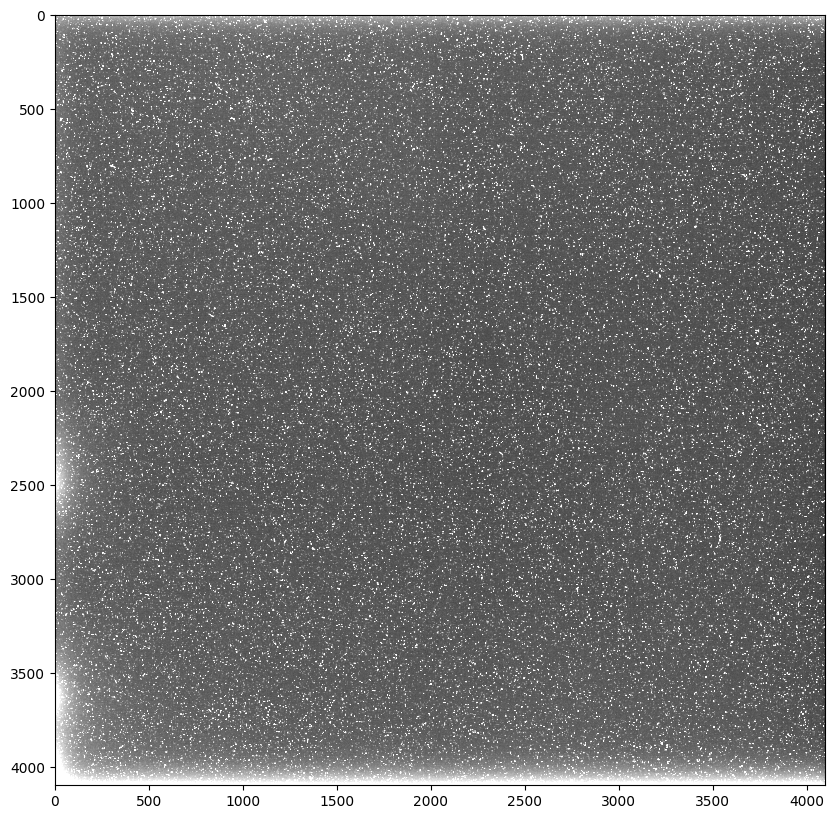

In [ ]:
#Grafiquemos el dark
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(dark1)

fig=plt.figure(figsize=(10,10))
plt.imshow(dark1,vmin=min_value,vmax=max_value,cmap='gray')
plt.show()

In [18]:
#Generamos un master dark para cada filtro y un dark current

master_darkV=np.median([dark1,dark2,dark3,dark4,dark5,dark6,dark7,dark8,dark9,dark10],axis=0) #Combinación simple de darks, incluye bias
#Generamos un factor escala debido a que no poseemos darks de 900 segundos para el filtro B
factor_escala = 900 / 600
master_darkB = master_darkV * factor_escala

with fits.open('master_bias.fit') as hdul:
    master_bias = hdul[0].data  # Extraemos los datos del archivo FITS
dark_current=np.mean([dark1-master_bias,dark2-master_bias,dark3-master_bias,dark4-master_bias,dark5-master_bias,dark6-master_bias,dark7-master_bias,dark8-master_bias,dark9-master_bias,dark10-master_bias],axis=0)/600 #Dark por segundo, no incluye bias


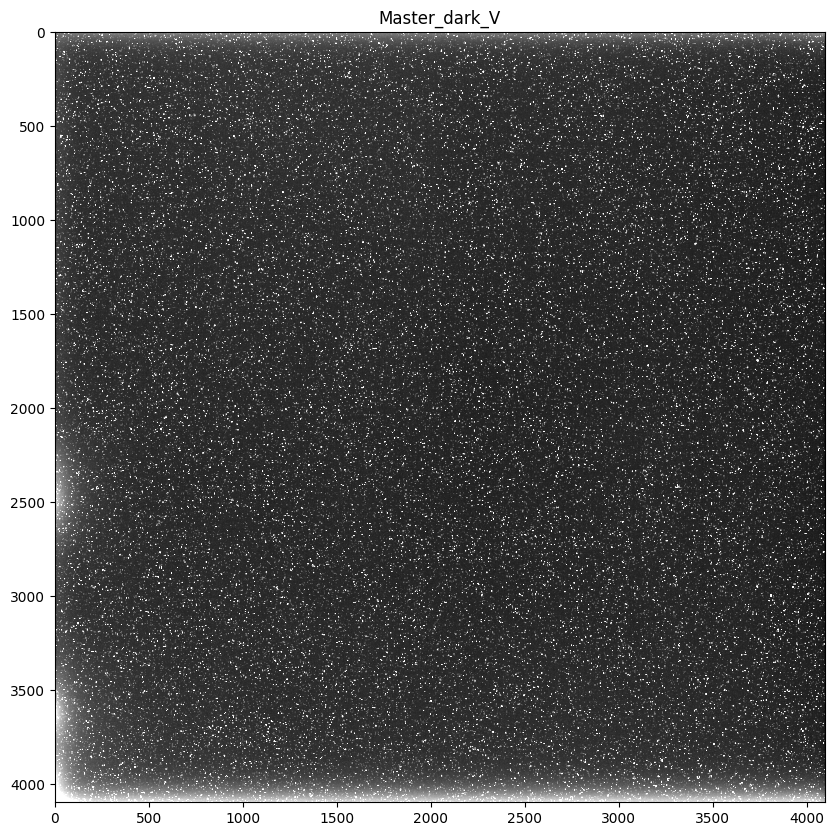

In [19]:
zscale=ZScaleInterval(contrast=0.10)
min_value,max_value=zscale.get_limits(master_darkV)
fig=plt.figure(figsize=(10,10))
plt.imshow(master_darkV,vmin=min_value,vmax=max_value,cmap='gray')
plt.title('Master_dark_V')
plt.savefig('Master_dark_V normalizado')
plt.show()

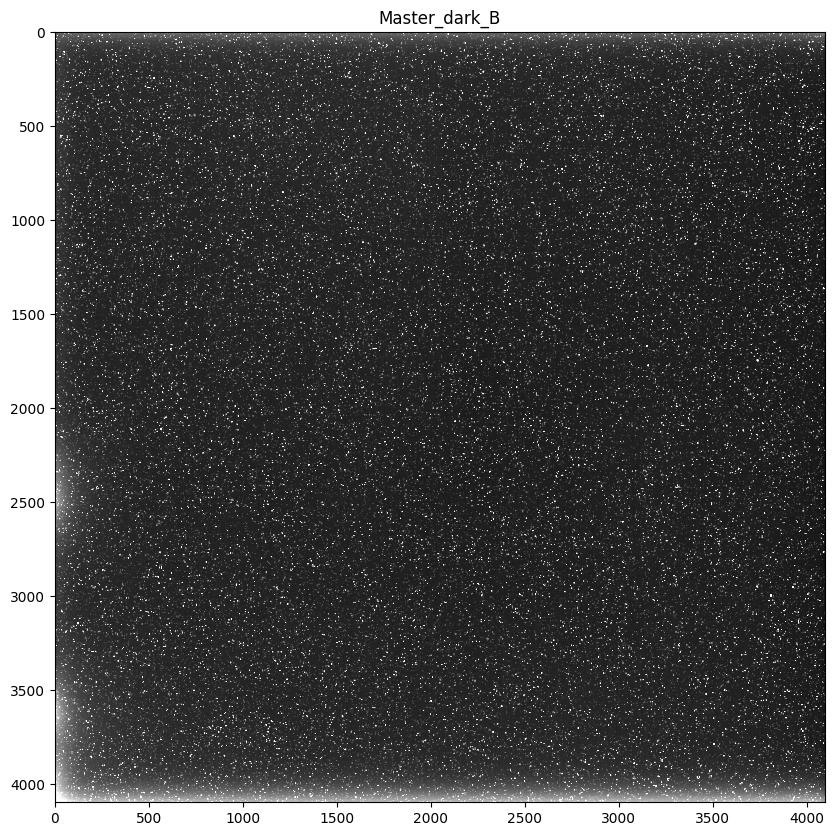

In [20]:
zscale=ZScaleInterval(contrast=0.08)
min_value,max_value=zscale.get_limits(master_darkB)
fig=plt.figure(figsize=(10,10))
plt.imshow(master_darkB,vmin=min_value,vmax=max_value,cmap='gray',)
plt.title('Master_dark_B')
plt.savefig('Master_dark_B normalizado')
plt.show()

In [21]:
from astropy.io import fits
hdu = fits.PrimaryHDU(master_darkV)
hdu.writeto('master_darkV.fit', overwrite=True)

hdu = fits.PrimaryHDU(master_darkB)
hdu.writeto('master_darkB.fit', overwrite=True)

hdu = fits.PrimaryHDU(dark_current)
hdu.writeto('dark_current.fit', overwrite=True)

## Master Dark HIP277

In [22]:
#Darks estrella 1
darkHIP1_1=fits.open('dark/Dark_20.000secs_00000027.fit')[0].data
darkHIP1_2=fits.open('dark/Dark_20.000secs_00000028.fit')[0].data
darkHIP1_3=fits.open('dark/Dark_20.000secs_00000029.fit')[0].data
darkHIP1_4=fits.open('dark/Dark_20.000secs_00000030.fit')[0].data
darkHIP1_5=fits.open('dark/Dark_20.000secs_00000031.fit')[0].data
darkHIP1_6=fits.open('dark/Dark_20.000secs_00000032.fit')[0].data
darkHIP1_7=fits.open('dark/Dark_20.000secs_00000033.fit')[0].data
darkHIP1_8=fits.open('dark/Dark_20.000secs_00000034.fit')[0].data
darkHIP1_9=fits.open('dark/Dark_20.000secs_00000035.fit')[0].data
darkHIP1_10=fits.open('dark/Dark_20.000secs_00000036.fit')[0].data

In [ ]:
#Master DARK B
master_darkB_HIP1=np.median([darkHIP1_1,darkHIP1_2,darkHIP1_3,darkHIP1_4,darkHIP1_5,darkHIP1_6,darkHIP1_7,darkHIP1_8,darkHIP1_9,darkHIP1_10],axis=0) #Combinación simple de darks, incluye bias
#Master DARK V
factor_escala2= 5 / 20
master_darkV_HIP1 = master_darkB_HIP1 * factor_escala2
#Dark Current
dark_currentHIP1=np.mean([darkHIP1_1-master_bias,darkHIP1_2-master_bias,darkHIP1_3-master_bias,darkHIP1_4-master_bias,darkHIP1_5-master_bias,darkHIP1_6-master_bias,darkHIP1_7-master_bias,darkHIP1_8-master_bias,darkHIP1_9-master_bias,darkHIP1_10-master_bias],axis=0)/20 #Dark por segundo, no incluye bias

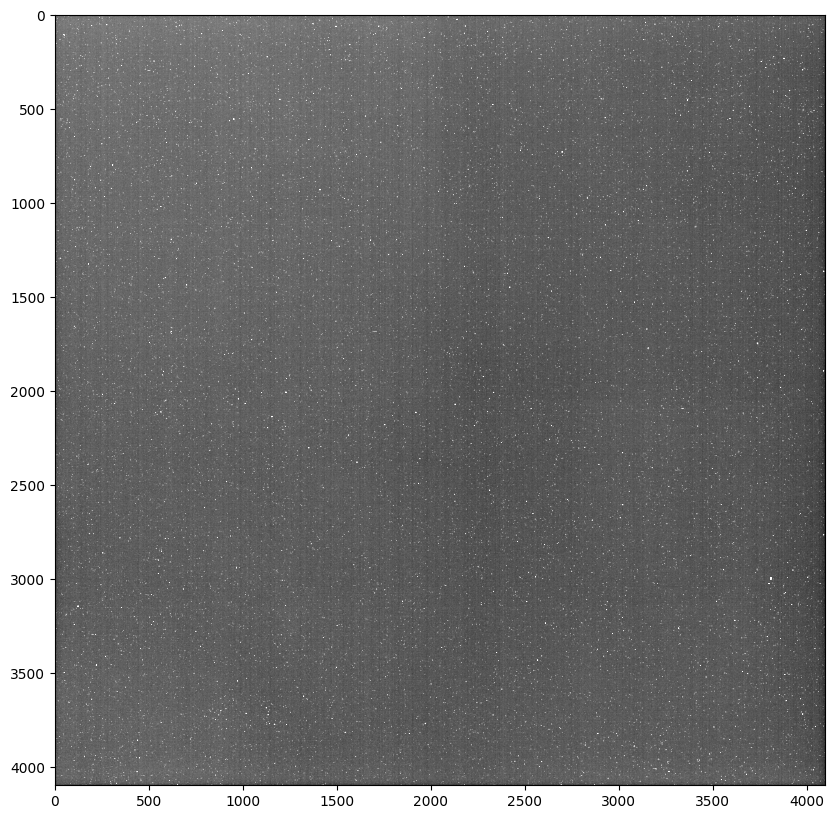

In [ ]:
#Grafiquemos el dark
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(master_darkB_HIP1)

fig=plt.figure(figsize=(10,10))
plt.imshow(master_darkB_HIP1,vmin=min_value,vmax=max_value,cmap='gray')
plt.savefig('Master dark B HIP 277')
plt.show()

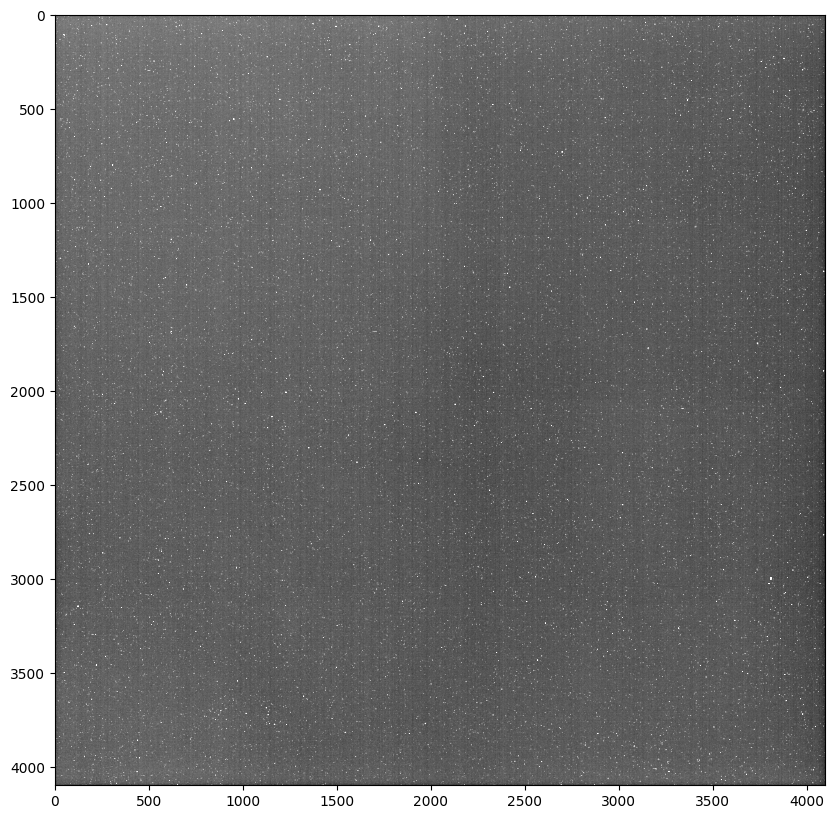

In [ ]:
#Grafiquemos el dark
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(master_darkV_HIP1)

fig=plt.figure(figsize=(10,10))
plt.imshow(master_darkV_HIP1,vmin=min_value,vmax=max_value,cmap='gray')
plt.savefig('Master dark V HIP 277')
plt.show()

In [26]:
from astropy.io import fits
hdu = fits.PrimaryHDU(master_darkB_HIP1)
hdu.writeto('master_darkB_hip277.fit', overwrite=True)

hdu = fits.PrimaryHDU(master_darkV_HIP1)
hdu.writeto('master_darkV_hip277.fit', overwrite=True)

hdu = fits.PrimaryHDU(dark_currentHIP1)
hdu.writeto('dark_current_hip277.fit', overwrite=True)

## Master Dark HIP1101

In [28]:
darkHIP2_1=fits.open('dark/Dark_20.000secs_00000027.fit')[0].data
darkHIP2_2=fits.open('dark/Dark_20.000secs_00000028.fit')[0].data
darkHIP2_3=fits.open('dark/Dark_20.000secs_00000029.fit')[0].data
darkHIP2_4=fits.open('dark/Dark_20.000secs_00000030.fit')[0].data
darkHIP2_5=fits.open('dark/Dark_20.000secs_00000031.fit')[0].data
darkHIP2_6=fits.open('dark/Dark_20.000secs_00000032.fit')[0].data
darkHIP2_7=fits.open('dark/Dark_20.000secs_00000033.fit')[0].data
darkHIP2_8=fits.open('dark/Dark_20.000secs_00000034.fit')[0].data
darkHIP2_9=fits.open('dark/Dark_20.000secs_00000035.fit')[0].data
darkHIP2_10=fits.open('dark/Dark_20.000secs_00000036.fit')[0].data

In [29]:
#Master DARK B
master_darkB_HIP2=np.median([darkHIP2_1,darkHIP2_2,darkHIP2_3,darkHIP2_4,darkHIP2_5,darkHIP2_6,darkHIP2_7,darkHIP2_8,darkHIP2_9,darkHIP2_10],axis=0) #Combinación simple de darks, incluye bias

#Master DARK V
factor_escala3 = 5 / 20 # el factor de escala se utiliza ya que solo poseemos darks de 20 segundos, por lo que lo necesitamos para los darks de 5 segundos 
master_darkV_HIP2 = master_darkB_HIP2 * factor_escala3

#Dark Current
dark_currentHIP2=np.mean([darkHIP2_1-master_bias,darkHIP2_2-master_bias,darkHIP2_3-master_bias,darkHIP2_4-master_bias,darkHIP2_5-master_bias,darkHIP2_6-master_bias,darkHIP2_7-master_bias,darkHIP2_8-master_bias,darkHIP2_9-master_bias,darkHIP2_10-master_bias],axis=0)/20 #Dark por segundo, no incluye bias

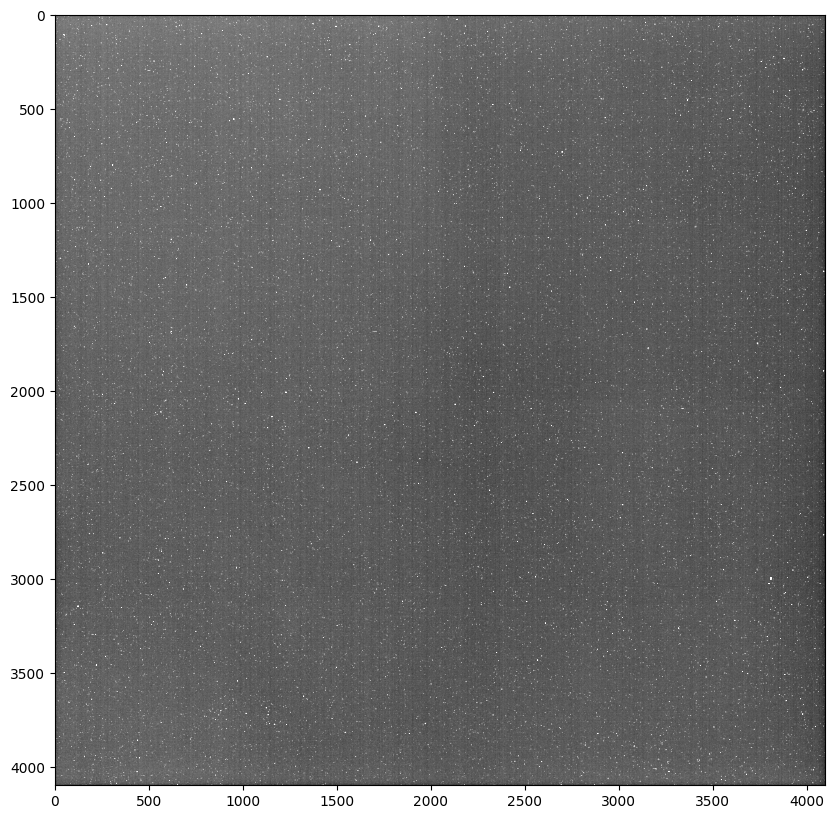

In [30]:
#Grafiquemos el dark
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(master_darkB_HIP2)

fig=plt.figure(figsize=(10,10))
plt.imshow(master_darkB_HIP2,vmin=min_value,vmax=max_value,cmap='gray')
plt.savefig('Master dark B HIP 1101')
plt.show()

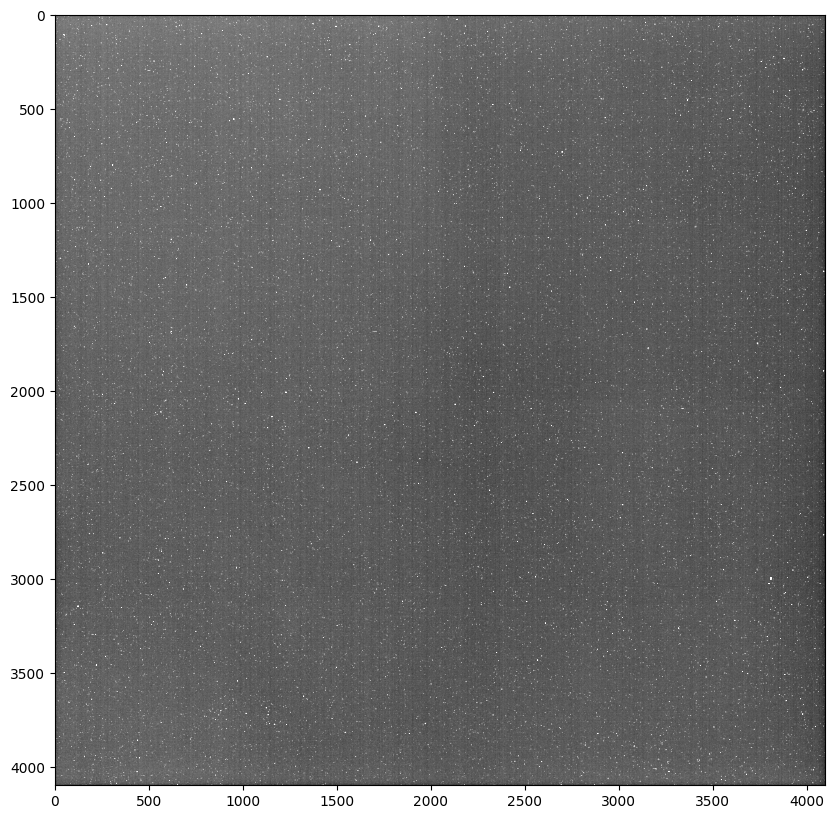

In [31]:
#Grafiquemos el dark
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(master_darkV_HIP2)

fig=plt.figure(figsize=(10,10))
plt.imshow(master_darkV_HIP2,vmin=min_value,vmax=max_value,cmap='gray')
plt.savefig('Master dark V HIP 1101')
plt.show()

In [32]:
from astropy.io import fits
hdu = fits.PrimaryHDU(master_darkB_HIP2)
hdu.writeto('master_darkB_hip1101.fit', overwrite=True)

hdu = fits.PrimaryHDU(master_darkV_HIP2)
hdu.writeto('master_darkV_hip1101.fit', overwrite=True)

hdu = fits.PrimaryHDU(dark_currentHIP2)
hdu.writeto('dark_current_hip1101.fit', overwrite=True)